# Classification project neural network

## import libray

In [1]:
#pip install mglearn
# %matplotlib inline
import numpy as np
import pandas as pd
#Deviding the data set 
from sklearn.model_selection import train_test_split
# neural network
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import  confusion_matrix
import mglearn
from sklearn.metrics import  confusion_matrix
from sklearn.datasets import make_moons

In [2]:
pathcsv = '../data/data_clean.csv'

## select columns

In [3]:
columns = [
    'wifi_01',
    'wifi_02',
    'wifi_03',
    'wifi_04',
    'wifi_05',
    'wifi_06',
    'wifi_07',
    'room'
    ]

## function read data

In [4]:
def redData(path):
    # read selected data
    data = pd.read_csv(path,usecols=columns)
    
    # rescaling data
    for i in range(0,len(columns)-1):
        data[columns[i]] = (data[columns[i]] - data[columns[i]].min()) / (data[columns[i]].max()-data[columns[i]].min())
    
    # convert data to numpy matrix
    cols = data.shape[1]
    xd = data.iloc[:,0:cols-1]
    yd = data.iloc[:,cols-1:cols] 
    x = np.matrix(xd.values)
    y = np.matrix(yd.values)
    
    return x,y,data

## read data

In [5]:
X,y,data = redData(pathcsv)

## split data to two part : taning 80% and test 20%

In [6]:
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)
print ("X_train.shape",X_train.shape)
print ("Y_train.shape",y_train.shape)
print ("X_test.shape",X_test.shape)
print ("Y_test.shape",y_test.shape)

X_train.shape (1600, 7)
Y_train.shape (1600, 1)
X_test.shape (400, 7)
Y_test.shape (400, 1)


## training par

In [7]:
_alpha =0.1 #2
_hiddenLS = 4#(10, 10)
clf = MLPClassifier(solver='lbfgs', alpha=_alpha, hidden_layer_sizes=_hiddenLS, random_state=1,verbose=False)
clf.fit( X_train, y_train )

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MLPClassifier(alpha=0.1, hidden_layer_sizes=4, random_state=1, solver='lbfgs')

## testing part

In [8]:
print("------------------------------- part test ") # ------------------------------- part test
prediction = clf.predict(X_test)
print("Predection : /n", prediction.T)
print("Class y : /n",  y_test.T)

------------------------------- part test 
Predection : /n [4 1 1 4 1 4 3 3 1 1 1 1 4 1 2 3 1 3 1 1 4 3 4 2 3 1 4 4 2 4 1 3 3 1 2 4 3
 2 4 4 4 3 1 2 3 2 1 2 3 4 4 2 1 1 2 1 4 1 4 3 2 3 3 2 2 2 4 4 2 4 1 2 2 4
 3 1 3 1 1 1 1 1 1 3 1 2 1 1 3 2 4 2 4 2 2 4 3 1 4 4 1 1 3 4 4 4 3 4 3 4 4
 4 3 3 4 3 3 3 2 1 1 4 4 2 3 2 1 1 2 3 1 2 1 4 1 2 3 2 3 2 1 3 1 2 2 2 3 4
 2 3 4 4 3 4 2 4 2 4 3 4 4 3 3 4 3 3 1 3 4 2 2 1 4 2 2 3 2 3 3 2 2 3 2 2 3
 4 4 1 2 1 1 2 3 4 4 3 2 4 3 3 2 3 3 1 1 4 3 1 1 3 2 4 1 4 3 4 4 2 4 1 2 1
 3 4 1 3 1 3 3 3 3 3 3 3 4 3 4 4 2 1 1 2 2 3 3 3 3 4 4 2 2 2 4 4 3 3 4 4 3
 1 4 1 1 1 2 4 3 1 3 2 3 1 1 2 2 4 1 4 1 1 1 4 2 1 1 2 1 3 1 4 4 1 4 3 3 1
 1 3 3 3 2 3 4 1 4 4 2 4 2 1 2 4 2 3 3 2 2 2 3 2 1 1 3 3 4 3 2 4 3 4 2 3 3
 3 2 4 3 3 1 1 2 4 2 2 2 4 1 3 4 3 3 1 1 4 1 3 1 4 3 4 4 2 2 3 4 2 3 3 4 1
 1 4 1 4 2 1 1 4 3 3 2 2 3 4 4 2 4 2 2 1 1 3 1 1 3 1 3 3 2 1]
Class y : /n [[4 1 1 4 1 4 3 3 1 1 1 1 3 1 2 3 4 3 1 1 4 3 4 2 3 1 4 4 2 4 1 3 3 1 2 4
  3 2 4 1 4 3 1 2 3 2 1 2 3 4 4 2 3 1 2 1 

## confusion matrix 

In [9]:
print('confusion matrix :\n',confusion_matrix(y_test,prediction))

confusion matrix :
 [[ 80   0   5   4]
 [  0  90   1   0]
 [ 11   0 104   1]
 [  8   0   0  96]]


## The accuracy

In [10]:
print('The accuracy :',metrics.accuracy_score(prediction,y_test))

The accuracy : 0.925


## plot

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


ValueError: X has 2 features, but MLPClassifier is expecting 7 features as input.

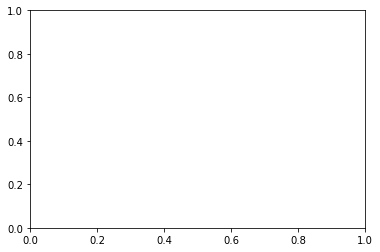

In [11]:
def plotDB(_clf,_X_train, _y_train):
    mglearn.plots.plot_2d_separator(_clf, _X_train, fill=True, alpha=.3)
    mglearn.discrete_scatter(_X_train[:, 0], _X_train[:, 1], _y_train)
    # plt.xlabel("Feature 0")
    # plt.ylabel("Feature 1")
    # plt.title("Decision Boundary ")

# X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
clf = MLPClassifier(solver ='lbfgs', random_state=0).fit(X_train, y_train)

plotDB(clf,X_test,y_test)

# End

In [ ]:
Print("------------------------------- END ") # ------------------------------- END